In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import numpy as np
import scipy as sp

### Method A: keep edge w.p. $p_s$

In [3]:
np.random.uniform(size=10)>0.1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [4]:
def method_a_sim(dout, ps, nsamples=100000):
    samples = [0]*nsamples
    for i in range(nsamples):
        if np.random.uniform() < ps:
            nedges = 1 + np.random.binomial(dout-1, ps)
            samples[i] = 1/float(nedges)
    return np.mean(samples), np.std(samples)
    

In [5]:
def method_a_analysis(dout,ps):
    return ( 1 - (1-ps)**dout )/float(dout)

In [12]:
dout = 3

In [13]:
samples = method_a_sim(dout, ps)

In [14]:
samples

(0.33247999999999994, 0.14006682785965657)

In [15]:
method_a_analysis(dout,ps)

0.333

### Method B: $1$ edge uniformly and Binomial from the rest

In [16]:
def method_b_sim(dout, ps, nsamples=100000):
    samples = [0]*nsamples
    for i in range(nsamples):
        if np.random.uniform() < 1/float(dout):
            nedges = 1 + np.random.binomial(dout-1, ps)
            samples[i] = 1/float(nedges)
        else:
            if np.random.uniform() < ps:
                nedges = 2 + np.random.binomial(dout-2, ps)
                samples[i] = 1/float(nedges)
    return np.mean(samples), np.std(samples)
#    return sum(samples)/float(len(samples))
    

In [17]:
def method_b_analysis(dout,ps):
    return 1 /float(dout)

In [18]:
ps=0.9

In [19]:
method_b_sim(dout,ps)

(0.33333833333333335, 0.11090160793093429)

In [20]:
method_b_analysis(dout,ps)

0.3333333333333333

In [21]:
dout=8
allps = np.linspace(0.01, 1)

In [22]:
meanstda = [method_a_sim(dout, ps) for ps in allps]
(meana, stda) = zip(*meanstda)
meana = np.array(meana)
stda = np.array(stda)

In [23]:
analytica = [method_a_analysis(dout,ps) for ps in allps]

In [24]:
meanstdb = [method_b_sim(dout, ps) for ps in allps]
(meanb, stdb) = zip(*meanstdb)
meanb = np.array(meanb)
stdb = np.array(stdb)

In [25]:
analyticb = [method_b_analysis(dout,ps) for ps in allps]

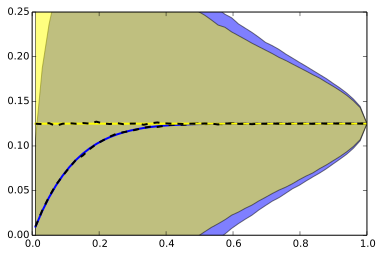

In [26]:
fig, ax = plt.subplots(1)
ax.plot(allps, analytica, lw=2, label='Method A: analysis', color='blue')
ax.plot(allps, meana, '--', lw=2, label='Method A: analysis', color='black')
ax.plot(allps, analyticb, lw=2, label='Method B: analysis', color='yellow')
ax.plot(allps, meanb, '--', lw=2, label='Method A: analysis', color='black')
ax.fill_between(allps, meana+stda, meana-stda, facecolor='blue', alpha=0.5)
ax.fill_between(allps, meanb+stdb, meanb-stdb, facecolor='yellow', alpha=0.5)

ax.axis([0, 1, 0, 2/float(dout)]);
